# Heart Disease Classification Model

Richard Kaldenhoven

Dataset available from:

https://www.kaggle.com/ronitf/heart-disease-uci

https://archive.ics.uci.edu/ml/datasets/Heart+Disease


## 1. Problem Definition

The goal of this notebook is to develop a machine learning model that can predict whether a patient has heart disease or not based on several features contained in the dataset, as described below:

Features:

* age
* sex (1=male, 0=female)
* cp - chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 0: asymptomatic)
* trestbp - resting blood pressure
* chol - serum Cholesterol in mg/dl
* fbs - fasting blood sugar > 120 mg/dl (1=yes,0=no)
* restecg - resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV, 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1=yes,0=no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)
* ca - number of major vessels (0-3) colored by flouroscopy
* thal (thalassemia) - 1 = normal; 2 = fixed defect; 3 = reversable defect

Target:
* 0 for no disease, 1 for disease

The target column is what the model will learn to predict, and since it takes values of either 0 or 1, the model will be performing a binary classification.

The features are a mix of categorical and numerical values, as indicated below:

Categorical features: sex, cp, fbs, restecg, exang, slope, ca, thal

Numerical features: age, trestbps, chol, thalach, oldpeak


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load Data

The code below loads and previews the dataset:

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values.

## 3. Exploratory Data Analysis

The following sections explore the dataset to find any outliers, determine how strong of a correlation there is between the features of the data and the target, and plot the relationships between the features and the target.


### 3.1 Check Feature Distributions for Outliers

The code below plots the distribution of values for the features in the dataset:

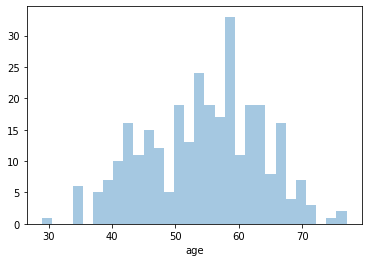

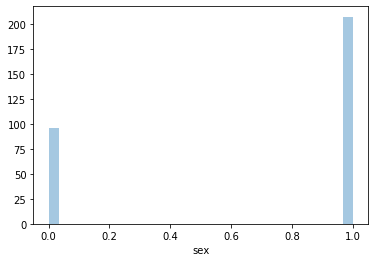

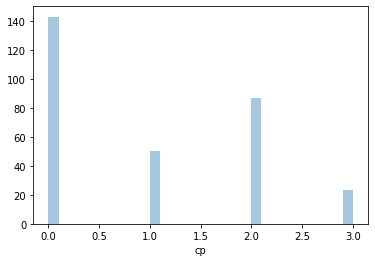

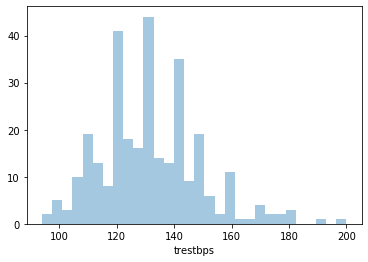

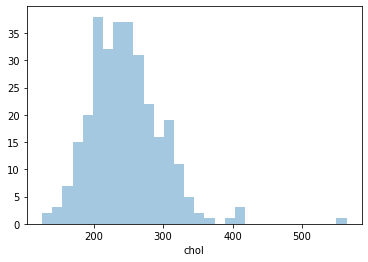

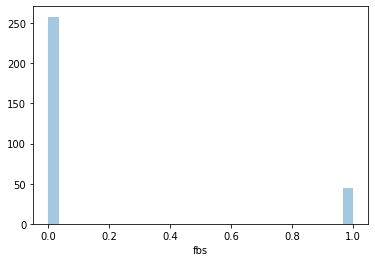

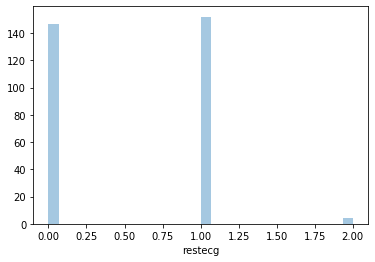

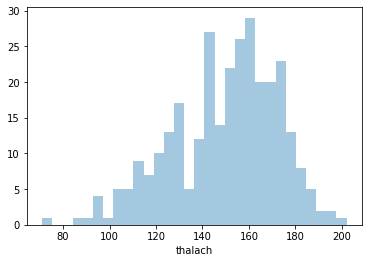

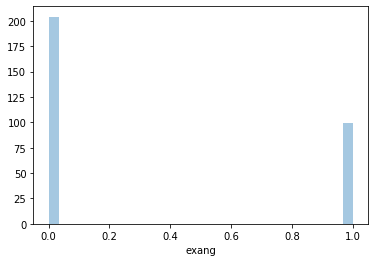

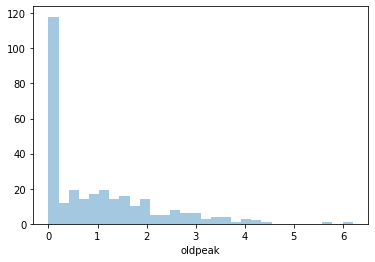

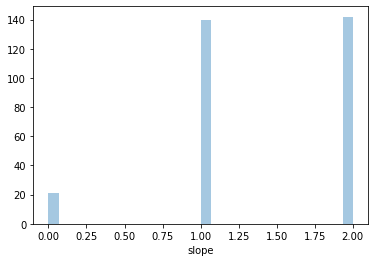

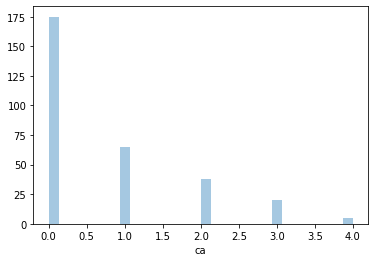

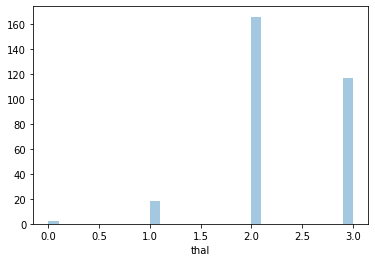

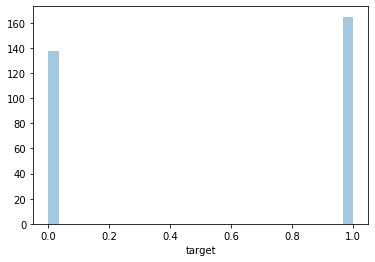

In [6]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    g = sns.distplot(df[col],kde=False,bins=30)

In [8]:
df[df['chol'] > 500]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


There is one observation with a 'chol' value greater than 500, which appears to be an outlier, and the observation does indicate heart disease. Without background medical knowledge it is difficult to categorize observations as outliers. The observation will not be removed.

### 3.2 Correlation between features and target

Correlation coefficients between the features and the target are given below:

In [9]:
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

There does not appear to be any strongly correlated features with the target (a strong correlation is taken to be 0.75 or greater), but on a relative basis there are features that are close in strength. For example, there are features that have similarily strong positive and negative correlation with the target, like cp and ca, that suggest there are features in the dataset that may increase or decrease the risk of heart disease.

The heatmap below visualizes the correlation between the features and the target. Features that have a stronger correlation with the target are located in the top left corner.

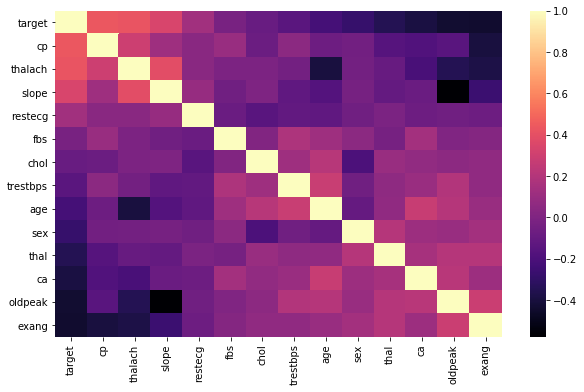

In [10]:
corr_list = df.corr()['target'].sort_values(ascending=False).index.to_list()
plt.figure(figsize=(10,6))
sns.heatmap(df[corr_list].corr(),cmap='magma')

#### 3.2.1 Positively Correlated Features with 'target'

Plots are generated below to show the relationships between the positively correlated features and the target.

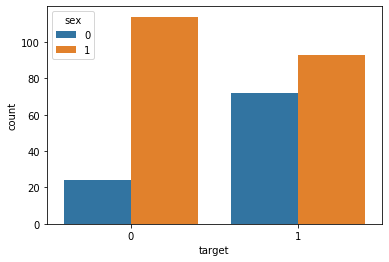

In [11]:
sns.countplot(x='target',data=df,hue='sex')

There are a similar number of male and female people with heart disease, but those without heart disease are most likely male.

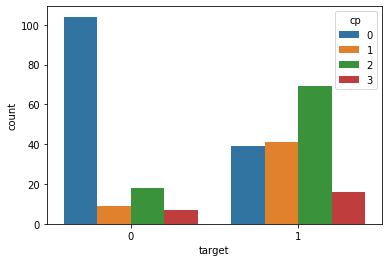

In [12]:
sns.countplot(x='target',data=df,hue='cp')

People that have heart disease most likely have chest pain type 2, atypical angina. People without heart disease overwhelmingly do not have chest pain.

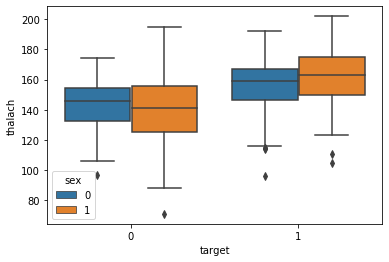

In [13]:
sns.boxplot(x='target',y='thalach',data=df,hue='sex')

The maximum heart rate achieved is similar for people with and without heart disease, proving the weak correlated with 'target'.

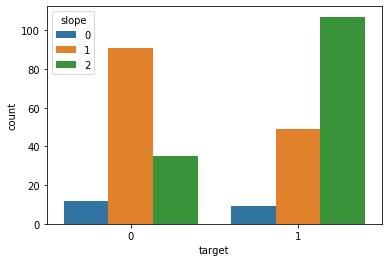

In [14]:
sns.countplot(x='target',data=df,hue='slope')

The 'slope' feature does not reveal much difference between people with and without heart disease, other than people with heart disease most likely have slope = 2 (flat), while people with no disease most likely have slope = 1 (upsloping).

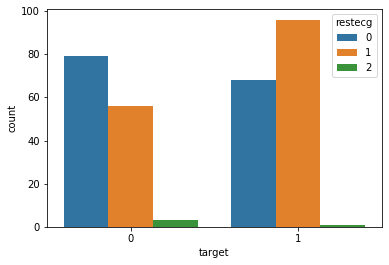

In [15]:
sns.countplot(x='target',data=df,hue='restecg')

For restecg, values of 1 are abnormal. For people with heart disease, there are more abnormal results (more values of 1 than 0) than for people without heart disease (more values of 0 than 1).

#### 3.2.2 Negatively Correlated Features with 'target'

Plots are generated below to show the relationships between the negatively correlated features and the target.

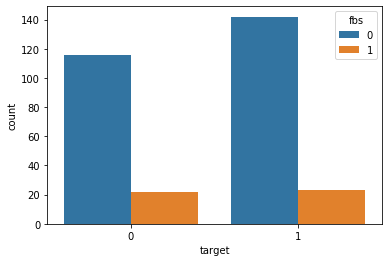

In [16]:
sns.countplot(x='target',data=df,hue='fbs')

The fasting blood sugar does not appear to impact the presence of heart disease, based on similar numbers for each case.

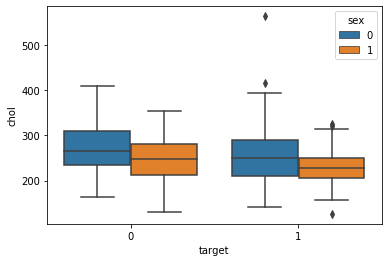

In [17]:
sns.boxplot(x='target',y='chol',data=df,hue='sex')

The concentration of cholesterol a patient has, by itself, does not seem to predict a case of heart disease. For the observations with heart disease, there does appear to be more outliers. 

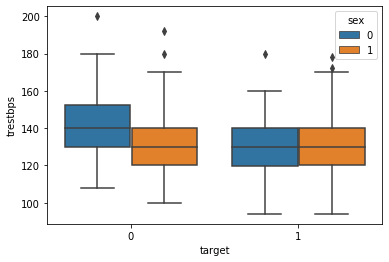

In [18]:
sns.boxplot(x='target',y='trestbps',data=df,hue='sex')

The resting blood pressure a patient has, by itself, is also not an indicator of heart disease. There are overlapping values between cases of heart disease and no heart disease.

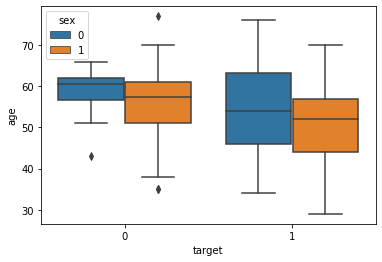

In [19]:
sns.boxplot(x='target',y='age',data=df,hue='sex')

Age does not appear to be a strong indicator of heart disease, those with heart disease can be in a large age range. There is overlap between people with and without heart disease.

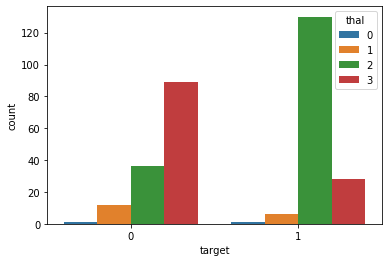

In [20]:
sns.countplot(x='target',data=df,hue='thal')

Heart disease is most common in people with the thalassemia type of 2 (fixed defect).

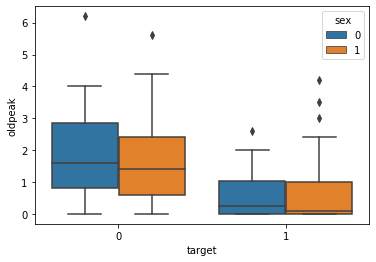

In [21]:
sns.boxplot(x='target',y='oldpeak',data=df,hue='sex')

For the oldpeak feature, there is weak evidence that a lower value more strongly indicates heart disease, give the overlap between quartile ranges.

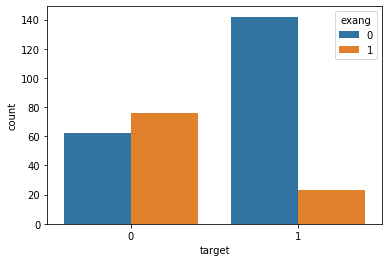

In [22]:
sns.countplot(x='target',data=df,hue='exang')

People with heart disease most likely do not show exercise induced angina.

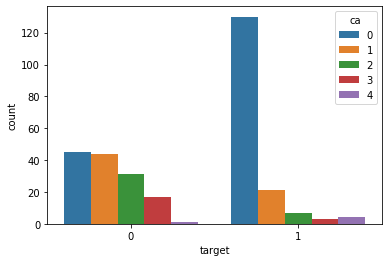

In [23]:
sns.countplot(x='target',data=df,hue='ca')

People with heart disease most likely have 0 blood vessels colored by flouroscopy, by a large number.

## 4. Data Preparation

Data Preparation for this problem consists of three steps: creating one-hot encoded dummy variables for the categorical features, splitting the data into train and test sets and scaling the data.

### 4.1 Create Dummy Variables for Categorical Features

One-hot encoding is the process of splitting a categorical feature into many dummy columns, where each column will represent one of the categorical values and contain values of 1 when a sample belongs to that category. The code below carries out this process, and the first dummy column for each category is removed to avoid having redundant columns.

In [24]:
cat_feat = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
df_dummy = pd.get_dummies(df,columns=cat_feat,drop_first=True)

In [25]:
df_dummy

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
301,57,130,131,115,1.2,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,1


### 4.2 Train/test split

The code below splits the one-hot encoded data into train and test sets.

In [26]:
X = df_dummy.drop('target',axis=1)
y = df_dummy['target']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 4.3 Data Scaling

As will be shown in Section 5, two distance based machine learning models will be used, making it necessary to scale the numerical features of the data so that some features are not more dominant than others. The code below separates the numerical features from the training and test sets, scales them by subtracting the mean and dividing by the standard deviation (of the training set), and then combines the scaled features with the categorical features to form complete datasets again.

In [29]:
X_col = X_train.columns.to_list()

num_col = ['age','trestbps','chol','thalach','oldpeak']

X_train_num = X_train[num_col]
X_test_num = X_test[num_col]

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = pd.DataFrame(scaler.transform(X_train_num), columns=num_col, index=X_train_num.index)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num), columns=num_col, index=X_test_num.index)

In [31]:
X_train = X_train_num_scaled.join(X_train.drop(num_col, axis=1))
X_test = X_test_num_scaled.join(X_test.drop(num_col, axis=1))

X_train = X_train[X_col]
X_test = X_test[X_col]

## 5. Developing a Machine Learning Model

It is not clear from the data what machine learning model would be most succesfull at modeling the problem, so several types are experimented with and then their performance on the test set is compared in order to determine which model is the most accurate at predicting the presence of heart disease.

The sections below detail the code used for building a model, generating predictions for the targets on the test set, and then evaluating the performance using classification metrics for each of the following types of machine learning models:

1. Logistic Regression
2. Random Forest
3. K Nearest Neighbors
4. Support Vector Machines





### 5.1 Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
logpred = logmodel.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

conf_mat_log = pd.DataFrame(confusion_matrix(y_test,logpred), 
                        index=[['Actual','Actual'],['Disease','No Disease']], 
                        columns=[['Predicted','Predicted'],['Disease','No Disease']]
                        )
conf_mat_log

Predicted           
                    Disease No Disease
Actual Disease           35          7
       No Disease         7         51

In [35]:
y_test.value_counts()

1    58
0    42
Name: target, dtype: int64

In [36]:
print(classification_report(y_test,logpred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.88      0.88      0.88        58

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



### 5.2 Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500,random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [38]:
clfpred = clf.predict(X_test)

In [39]:
conf_mat_clf = pd.DataFrame(confusion_matrix(y_test,clfpred), 
                        index=[['Actual','Actual'],['Disease','No Disease']], 
                        columns=[['Predicted','Predicted'],['Disease','No Disease']]
                        )
conf_mat_clf

Predicted           
                    Disease No Disease
Actual Disease           35          7
       No Disease         9         49

In [40]:
print(classification_report(y_test,clfpred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        42
           1       0.88      0.84      0.86        58

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



### 5.3 K Nearest Neighbors Model



Text(0, 0.5, 'Error Rate')

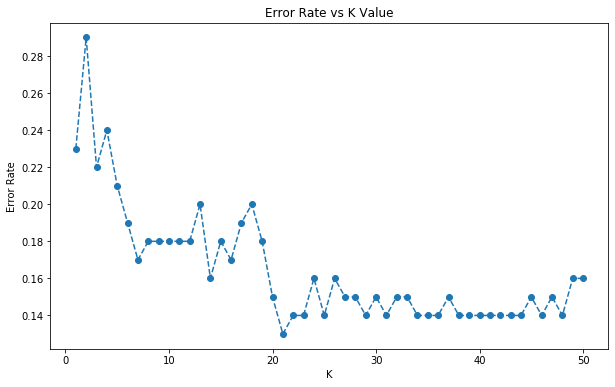

In [41]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,51):
    
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train,y_train)
    pred_i = model_knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,51),error_rate,linestyle='dashed',marker='o')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [42]:
model_knn = KNeighborsClassifier(n_neighbors=21)

model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [43]:
knnpred = model_knn.predict(X_test)

In [44]:
conf_mat_knn = pd.DataFrame(confusion_matrix(y_test,knnpred), 
                        index=[['Actual','Actual'],['Disease','No Disease']], 
                        columns=[['Predicted','Predicted'],['Disease','No Disease']]
                        )
conf_mat_knn

Predicted           
                    Disease No Disease
Actual Disease           35          7
       No Disease         6         52

In [45]:
print(classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.88      0.90      0.89        58

    accuracy                           0.87       100
   macro avg       0.87      0.86      0.87       100
weighted avg       0.87      0.87      0.87       100



### 5.4 Support Vector Machine Model

In [46]:
from sklearn.svm import SVC

svc_model = SVC()

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

svc_model_grid = GridSearchCV(SVC(),param_grid,verbose=0)
svc_model_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
svc_model_grid.best_params_

{'C': 10, 'gamma': 0.01}

In [49]:
svcpred = svc_model_grid.predict(X_test)

In [50]:
conf_mat_svc = pd.DataFrame(confusion_matrix(y_test,svcpred), 
                        index=[['Actual','Actual'],['Disease','No Disease']], 
                        columns=[['Predicted','Predicted'],['Disease','No Disease']]
                        )
conf_mat_svc

Predicted           
                    Disease No Disease
Actual Disease           34          8
       No Disease         7         51

In [51]:
print(classification_report(y_test,svcpred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.86      0.88      0.87        58

    accuracy                           0.85       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.85      0.85      0.85       100



## 6. Comparing Model Performance

Confusion matrices for each model are plotted so that the performance of each model developed in Section 5 can be compared.

Text(403.79999999999995, 0.5, '')

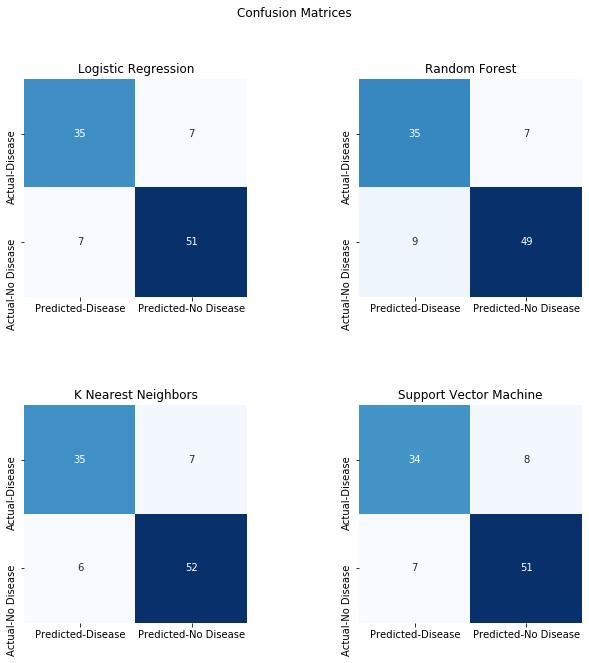

In [52]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=.5,hspace=.5)

plt.suptitle('Confusion Matrices')

plt.subplot(2,2,1)
plt.title('Logistic Regression')
sns.heatmap(conf_mat_log,annot=True,cbar=False,cmap='Blues')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,2)
plt.title('Random Forest')
sns.heatmap(conf_mat_clf,annot=True,cbar=False,cmap='Blues')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,3)
plt.title('K Nearest Neighbors')
sns.heatmap(conf_mat_knn,annot=True,cbar=False,cmap='Blues')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,4)
plt.title('Support Vector Machine')
sns.heatmap(conf_mat_svc,annot=True,cbar=False,cmap='Blues')
plt.xlabel('')
plt.ylabel('')

Classification reports are also printed to provide more performance metrics:

In [53]:
print('Classification Reports\n\n')

print('Logistic Regression')
print(classification_report(y_test,logpred))

print('Random Forest')
print(classification_report(y_test,clfpred))

print('K Nearest Neighbors')
print(classification_report(y_test,knnpred))

print('Support Vector Machines')
print(classification_report(y_test,svcpred))

Classification Reports


Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.88      0.88      0.88        58

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100

Random Forest
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        42
           1       0.88      0.84      0.86        58

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

K Nearest Neighbors
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.88      0.90      0.89        58

    accuracy                           0.87       100
   macro avg       0.87      0.86      0.87      

From scikitlearn documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.



The confusion matrices show that the K Nearest Neighbors model has the lowest number of misclassifications (false negative and false positive), which is also reflected in the highest precision and recall scores. The number of false negatives (predicted heart disease when there is actually no heart disease) is an important metric to consider, as it has important implications on misdiagnosing patients. In this case the K nearest neighbors model has the lowest number of false negatives.



# 7. Conclusion

**Observations from data:**

* There are a similar number of male and female people with heart disease.

* People that have heart disease most likely have chest pain type 2, atypical angina. 

* The maximum heart rate achieved is similar for people with and without heart disease, proving the weak correlated with 'target'.

* People with heart disease most likely have slope = 2 (flat), while people with no disease most likely have slope = 1 (upsloping).

* For people with heart disease, there are more abnormal rest ecg results (more values of 1 than 0) than for people without heart disease (more values of 0 than 1).

* The fasting blood sugar does not appear to impact the presence of heart disease.

* The concentration of cholesterol a patient has, by itself, does not seem to predict a case of heart disease.

* The resting blood pressure a patient has, by itself, is also not an indicator of heart disease.

* Age does not appear to be a strong indicator of heart disease.

* Heart disease is most common in people with the thalassemia type of 2 (fixed defect).

* For the oldpeak feature, there is weak evidence that a lower value more strongly indicates heart disease.

* People with heart disease most likely do not show exercise induced angina.

* People with heart disease most likely have 0 blood vessels colored by flouroscopy.

**The best model tested here for the application of predicting heart disease is K Nearest Neighbors, as it has the highest classification metrics (precision, recall) and the lowest number of false negatives.**